#  **Replicating Paper 2: SVT Algorithm for Efficient Sparse Matrix Recovery and its Python Implementation**
#### <font color="#9B1B30 ">**See Appendix for Details on Collaborative Filtering** </font>
## **Background**
**Matrix completion** is a critical problem in fields such as machine learning, computer vision, and control systems. It involves recovering a large matrix from a small subset of its entries, assuming the matrix has low rank. For example, in recommendation systems like Netflix, the user ratings matrix is often assumed to be low-rank because users' preferences are influenced by a limited number of factors.

The SVT algorithm offers a computationally efficient method for solving the nuclear norm minimization problem, which is a convex relaxation of the rank minimization problem. The algorithm performs iterative **soft-thresholding operations** on the singular values of matrices, utilizing their sparsity and low-rank properties to reduce computational costs and storage requirements.

## **Objective**
The objective of this notebook is to **implement the Singular Value Thresholding (SVT) algorithm for matrix completion** as outlined in the paper [**A Singular Value Thresholding Algorithm for Matrix Completion by Jian-Feng Cai, Emmanuel J. Candes, and Zuowei Shen**](https://arxiv.org/abs/0810.3286). The implementation will be evaluated using the **GoodBooks dataset**, which contains ratings for 1,000 books by 6,248 users. The goal is to showcase the algorithm's ability to recover low-rank matrices from a sparse subset of their entries.





## **Optimization Problem**

$$\text{min} \text({ Rank(Z)})  \underset{\text{Convex  Relaxation}}{=}
  \text{min} \quad \|Z\|_*$$  

$$\text{subject to} \quad P_\Omega(X) = P_\Omega(M)$$


$$
P_\Omega(X)_{i,j}=\left\{\begin{array}{ll}X_{i,j}&\text{if}(i,j)\text{is observed}\\0&\text{if}(i,j)\text{is missing}\end{array}\right.
$$


## **Methodology**

1. **Matrix Generation**:
   - Import the sparse GoodBooks rating matrix of size 6248 users by 1000 books, denoted as $M$. Approximately **98.4% of the elements** in $M$ are zeros, while the remaining **1.6%** have values ranging from 1 to 5.
   - From the **99,831 non-zero elements**, randomly select 80% to form the training matrix $X$. The remaining 20% will be used as the validation matrix to calculate the relative error. The distribution of zeros and non-zero elements in the $X$ matrix and the validation matrix is noted.

2. **SVT Algorithm Implementation**:
   - Initialize parameters and matrices: Set the threshold $\tau$ to 4600 and the step size $\delta$ to 1.26. Initialize $Y^0$ as a random matrix of the same dimensions as $M$.
   - Iteratively update matrices $X^k$ and $Y^k$ using the SVT update rules:

     $$
     X^k = \text{shrink}(Y^{k-1}, \tau)
     $$

     $$
     Y^k = Y^{k-1} + \delta_k P_\Omega(M - X^k)
     $$

   - Implement the `shrink` function to perform **soft-thresholding** on the singular values of the matrix.

3. **Matrix Completion**:
   - Perform matrix completion on the training matrix $X$ using the predefined $\tau$ and $\delta$ values over **150 iterations**. The goal is to estimate **98.72% of the zero elements** (including those from both the original matrix and the validation matrix) based on the **1.228% non-zero elements** in the training matrix. Detailed results will be provided in the following sections.

4. **Convergence and Stopping Criterion**:
   - The iterations will terminate after 150 iterations.

5. **Evaluation**:
   - Compare the recovered matrix $X^k$ with the validation matrix $X_{\text{validation}}$ using relative error metrics.
   - Provide **plots and tables** showing the performance of the SVT algorithm.

   - Calculate the relative errors for each iteration using the formula:


$$
\text{Relative Error} = \frac{\|X_{\text{validation}} - X^K_{\text{validation}}\|_F^2}{\|X_{\text{validation}}\|_F^2}
$$

## Results

- **Performance Visualization**: The performance of the SVT algorithm is illustrated through a series of plots and tables. These visualizations include:
  - **Convergence Plots**: Graphs that track the relative error over the iterations, demonstrating how the algorithm converges towards a solution.
  - **Error Trends**: Detailed plots showing the reduction in relative error with each iteration, highlighting the algorithm's effectiveness in minimizing error over time.

- **Convergence Behavior**: The algorithm's convergence was analyzed, revealing a consistent decrease in relative error as the number of iterations increased. This behavior confirms that the SVT algorithm efficiently narrows the gap between the recovered matrix and the true matrix.

- **Final Results**: After **150 iterations**, the SVT algorithm achieved a final relative error of **6.75%**. This low error rate demonstrates the algorithm's proficiency in matrix completion, validating its effectiveness in recovering the underlying low-rank structure from the sparse data.

Overall, the results underscore the SVT algorithm's capability to deliver accurate matrix recovery and highlight its practical applicability in handling large-scale, sparse datasets.


## **Pseudocode: Singular Value Thresholding (SVT) Algorithm (Page 20)**

**Input:** Sampled set $\Omega$ and sampled entries $\mathcal{P}_{\Omega}( M)$, step size $\delta$, tolerance $\epsilon$, parameter $\tau$, increment $\ell$, and maximum iteration count $k_{\max}$

**Output:** Matrix $X^{\mathrm{opt}}$

**Description:** Recover a low-rank matrix $M$ from a subset of sampled entries

**Steps:**


1. Set $\mathbf{Y}^0 = k_0 \delta \, \mathcal{P}_{\Omega}(\mathbf{M})$

2. Set $r_0 = 0$.

3. For $k = 1$ to $k_{\max}$:
  > Set $s_k = r_{k-1} + 1$.
   
  >   **Repeat:**
  >
  > Compute $[\mathbf{U}^{k-1}, \mathbf{\Sigma}^{k-1}, \mathbf{V}^{k-1}]_{s_k}$.
  >
  >Set $s_k = s_k + \ell$.
  >
  > **Until $\sigma_{s_k - \ell}^{k-1} \le \tau$.**
  
  >Set $r_k = \max \{ j : \sigma_j^{k-1} > \tau \}$.
  >
  >Set $\mathbf{X}^k = \sum_{j = 1}^{r_k} (\sigma_j^{k-1} - \tau) \mathbf{u}_j^{k-1} \mathbf{v}_j^{k-1}$.
  >
  >If $\frac{\|\mathcal{P}_{\Omega}(\mathbf{X}^k - \mathbf{M})\|_F}{\|\mathcal{P}_{\Omega} \mathbf{M}\|_F} \le \epsilon$, then break.
  >
  >Set $Y_{ij}^k = \begin{cases}
  0 & \text{if } (i,j) \notin \Omega, \\
  Y_{ij}^{k-1} + \delta (M_{ij} - X_{ij}^k) & \text{if } (i,j) \in \Omega
  \end{cases}$.
  >
  > **end for k**

4. Set $\mathbf{X}^{\text{opt}} = \mathbf{X}^k$.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.linalg import svd


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Load and preprocess the dataset
# Read the CSV file into a DataFrame
Book_Rating = pd.read_csv('GoodBooks_Ratings.csv', delimiter=',')

# Remove duplicate entries for the same user and book, keeping the last occurrence
Book_Rating = Book_Rating.drop_duplicates(
    subset=['user_id', 'book_id'], keep='last')

# Print the number of null values in each column of the DataFrame
print(f"Number of null values in 'Book-Rating': {Book_Rating.isnull().sum()}")

# Display the DataFrame to verify the preprocessing
Book_Rating


Number of null values in 'Book-Rating': book_id       0
user_id       0
rating        0
Unnamed: 3    0
dtype: int64


,book_id,user_id,rating,Unnamed: 3
0,1,314,5,True
1,1,439,3,True
2,1,588,5,True
3,1,1169,4,True
4,1,1185,4,True
...,...,...,...,...
99992,1000,52503,3,True
99993,1000,52748,4,True
99994,1000,52994,5,True
99995,1000,53173,4,True


In [3]:
# Extract arrays of user IDs, book IDs, and ratings from the DataFrame
User_array = Book_Rating['user_id'].values
Book_array = Book_Rating['book_id'].values
Rating_array = Book_Rating['rating'].values

# Create mappings from original user and book IDs to consecutive integer indices
user_mapping = {user_id: index for index,
                user_id in enumerate(Book_Rating['user_id'].unique())}
book_mapping = {book: index for index,
                book in enumerate(Book_Rating['book_id'].unique())}

# Map the original IDs to the new integer indices
user_indices = [user_mapping[user_id] for user_id in User_array]
book_indices = [book_mapping[bookid] for bookid in Book_array]

# Create a sparse matrix using the ratings and the user/book indices
# Then convert the sparse matrix to a dense matrix
Matrix_book_data = csc_matrix((Rating_array, (user_indices, book_indices)))
Matrix_book = Matrix_book_data.toarray()

# Print the shape of the dense matrix and the matrix itself to verify
print(f"Sparse matrix shape: {Matrix_book.shape}")
print(Matrix_book)


Sparse matrix shape: (6248, 1000)
[[5 0 3 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 5]
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 3]]


In [4]:
# Print matrix details
print(f"Sparse matrix shape: {Matrix_book.shape}")
print(f"Maximum value: {np.max(Matrix_book)}")
print(f"Minimum value: {np.min(Matrix_book)}")
print('-' * 60)
print(f"Number of zeros: {np.count_nonzero(Matrix_book == 0)}")
print(f"Percentage of zeros: {round(np.count_nonzero(Matrix_book == 0) / Matrix_book.size * 100, 3)}")
print(f"Number of non-zeros: {np.count_nonzero(Matrix_book != 0)}")
print( f"Percentage of non-zeros: {round(np.count_nonzero(Matrix_book != 0) / Matrix_book.size * 100, 3)}")


Sparse matrix shape: (6248, 1000)
Maximum value: 5
Minimum value: 0
------------------------------------------------------------
Number of zeros: 6148169
Percentage of zeros: 98.402
Number of non-zeros: 99831
Percentage of non-zeros: 1.598


In [5]:
# Create a mask to identify non-zero entries in the matrix
non_missing_mask = Matrix_book != 0

# Get indices of non-zero entries
non_missing_indices = np.nonzero(non_missing_mask)

# Calculate the total number of non-zero entries
num_non_zero = len(non_missing_indices[0])

# Define the number of non-zero entries for training and validation sets
X_80 = int(num_non_zero * 0.8)  # 80% for training
X_validation_20 = num_non_zero - X_80  # Remaining 20% for validation

# Generate an array of indices for non-zero entries and shuffle them
indices = np.arange(num_non_zero)
np.random.shuffle(indices)

# Split the shuffled indices into training and validation sets
indices_X = indices[:X_80]
indices_X_validation = indices[X_80:]

# Create boolean masks for the training and validation sets
mask_X = np.zeros_like(Matrix_book, dtype=bool)
mask_X_validation = np.zeros_like(Matrix_book, dtype=bool)

# Set True for positions in the training mask where non-zero entries are selected
mask_X[non_missing_indices[0][indices_X],
       non_missing_indices[1][indices_X]] = True

# Set True for positions in the validation mask where non-zero entries are selected
mask_X_validation[non_missing_indices[0][indices_X_validation],
                  non_missing_indices[1][indices_X_validation]] = True

# Create the training matrix by retaining only the entries indicated by the training mask
Matrix_book_X = np.where(mask_X, Matrix_book, 0)

# Create the validation matrix by retaining only the entries indicated by the validation mask
Matrix_book_X_validation = np.where(mask_X_validation, Matrix_book, 0)


In [6]:
# Print details of X and validation matrices
print(f"Shape of X matrix: {Matrix_book_X.shape}")
print(f"Maximum value: {np.max(Matrix_book_X)}")
print(f"Minimum value: {np.min(Matrix_book_X)}")
print('-' * 60)
print(f"Number of zeros: {np.count_nonzero(Matrix_book_X == 0)}")
print(
    f"Percentage of zeros: {round(np.count_nonzero(Matrix_book_X == 0) / Matrix_book_X.size * 100, 3)}")
print(f"Number of non-zeros: {np.count_nonzero(Matrix_book_X != 0)}")
print(
    f"Percentage of non-zeros: {round(np.count_nonzero(Matrix_book_X != 0) / Matrix_book_X.size * 100, 3)}")


Shape of X matrix: (6248, 1000)
Maximum value: 5
Minimum value: 0
------------------------------------------------------------
Number of zeros: 6168136
Percentage of zeros: 98.722
Number of non-zeros: 79864
Percentage of non-zeros: 1.278


In [7]:
# Print the shape of the X validation matrix
print(f"Shape of X validation matrix: {Matrix_book_X_validation.shape}")

# Print the maximum value in the X validation matrix
print(f"Maximum value: {np.max(Matrix_book_X_validation)}")

# Print the minimum value in the X validation matrix
print(f"Minimum value: {np.min(Matrix_book_X_validation)}")

# Print a separator line for readability
print('-' * 60)

# Count and print the number of zeros in the X validation matrix
print(f"Number of zeros: {np.count_nonzero(Matrix_book_X_validation == 0)}")

# Calculate and print the percentage of zeros in the X validation matrix
print(
    f"Percentage of zeros: {round(np.count_nonzero(Matrix_book_X_validation == 0) / Matrix_book_X_validation.size * 100, 3)}")

# Count and print the number of non-zero entries in the X validation matrix
print(
    f"Number of non-zeros: {np.count_nonzero(Matrix_book_X_validation != 0)}")

# Calculate and print the percentage of non-zero entries in the X validation matrix
print(
    f"Percentage of non-zeros: {round(np.count_nonzero(Matrix_book_X_validation != 0) / Matrix_book_X_validation.size * 100, 3)}")


Shape of X validation matrix: (6248, 1000)
Maximum value: 5
Minimum value: 0
------------------------------------------------------------
Number of zeros: 6228033
Percentage of zeros: 99.68
Number of non-zeros: 19967
Percentage of non-zeros: 0.32


In [8]:
# Validate that the splits are correct by checking if the total number of non-missing entries
# in the original matrix matches the sum of non-missing entries in the training and validation matrices

# Compute the difference between the total non-missing entries in the original matrix and
# the sum of non-missing entries in the training and validation matrices
review_diff = np.count_nonzero(Matrix_book != 0) - np.count_nonzero(
    Matrix_book_X != 0) - np.count_nonzero(Matrix_book_X_validation != 0)

# Compute the difference using masks to ensure that the splits were done correctly
review_diff2 = np.count_nonzero(
    Matrix_book != 0) - np.sum(mask_X) - np.sum(mask_X_validation)

# Print the difference to check if the non-missing entries were correctly distributed between
# the training and validation matrices
print(
    f'Total non-missing - non-missing X - non-missing X validation: {review_diff}')

# Print the difference using mask sums to double-check the correctness of the splits
print(
    f'Total non-missing - non-missing X - non-missing X validation (check Masks): {review_diff2}')


Total non-missing - non-missing X - non-missing X validation: 0
Total non-missing - non-missing X - non-missing X validation (check Masks): 0


In [9]:
# Compute the total number of missing entries in the training matrix (Matrix_book_X)
m = mask_X.sum()

# Create a mask for missing entries by inverting the mask_X (i.e., non-zeros become True)
mask_missing = ~mask_X

# Compute the total number of missing entries in the original matrix
total_missing_num = np.sum(mask_missing)

# Compute the difference between the total number of missing entries and the sum of non-missing
# entries in the validation matrix and the number of zeros in the original matrix
review_diff3 = total_missing_num - \
    np.sum(mask_X_validation) - np.count_nonzero(Matrix_book == 0)

# Print the total number of missing entries in the original matrix
print(f'Total missing: {total_missing_num}')

# Print the difference between the total number of missing entries, non-missing entries in the
# validation matrix, and the number of zeros in the original matrix to check if all missing data
# has been accounted for correctly
print(f'Total missing - non-missing X validation - missing data: {review_diff3}')


Total missing: 6168136
Total missing - non-missing X validation - missing data: 0


In [10]:
# Initialize variables for matrix completion
# Y = np.zeros(Matrix_book.shape)
# tau =  5 * np.min(Matrix_book.shape)  # Page 20
# Initialize variables for matrix completion
Y = 5 * np.random.rand(*Matrix_book.shape)  # Random matrix between 0 and 5
delta = 1.25 * Matrix_book.size / (~mask_X).sum()  # Calculate delta Page 17
tau = 4600  # Set tau value

print(f"Shape of Y: {Y.shape}")


Shape of Y: (6248, 1000)


In [11]:
# Initialize a dictionary to store the relative errors for each iteration
RE_list = {}

# Perform the SVT algorithm for 150 iterations
for i in range(150):
    # Compute the Singular Value Decomposition (SVD) of the current matrix Y
    u, s, vh = svd(Y, full_matrices=False)

    # Apply soft-thresholding to the singular values
    s_t = np.maximum(s - tau, 0)

    # Reconstruct the matrix Z using the thresholded singular values
    Z = (u[:, :1000] * s_t) @ vh

    # Compute the prediction error matrix P
    P = Matrix_book_X - Z

    # Set the entries corresponding to missing data in the prediction error matrix to 0
    P[mask_missing] = 0

    # Update the matrix Y using the step size delta and the prediction error matrix P
    Y0 = Y.copy()
    Y = Y0 + delta * P

    # Compute the relative error of the reconstructed matrix Z with respect to the validation matrix
    relative_error = np.sum((Z[mask_X_validation] - Matrix_book_X_validation[mask_X_validation])
                            ** 2) / np.sum(Matrix_book_X_validation[mask_X_validation]**2)

    # Optionally compute the Mean Squared Error (MSE) for additional evaluation
    MSE = np.mean(
        (Z[mask_X_validation] - Matrix_book_X_validation[mask_X_validation])**2)

    # Store the relative error for the current iteration in the dictionary
    RE_list[i] = relative_error

    # Print the relative error for the current iteration
    if (i + 1) % 10 == 0 or i == 0:
        print(f"Iteration {i+1}  -  Relative Error: {relative_error:.4f}")
        print('-' * 60 + '\n')


Iteration 1  -  Relative Error: 0.7051
------------------------------------------------------------

Iteration 10  -  Relative Error: 0.3935
------------------------------------------------------------

Iteration 20  -  Relative Error: 0.2351
------------------------------------------------------------

Iteration 30  -  Relative Error: 0.1714
------------------------------------------------------------

Iteration 40  -  Relative Error: 0.1382
------------------------------------------------------------

Iteration 50  -  Relative Error: 0.1185
------------------------------------------------------------

Iteration 60  -  Relative Error: 0.1057
------------------------------------------------------------

Iteration 70  -  Relative Error: 0.0970
------------------------------------------------------------

Iteration 80  -  Relative Error: 0.0907
------------------------------------------------------------

Iteration 90  -  Relative Error: 0.0843
-------------------------------------------

In [12]:
# # Print relative errors for all iterations
# for key, value in RE_list.items():
#     print(f"Iteration {key+1}, RE: {value:.4f}")


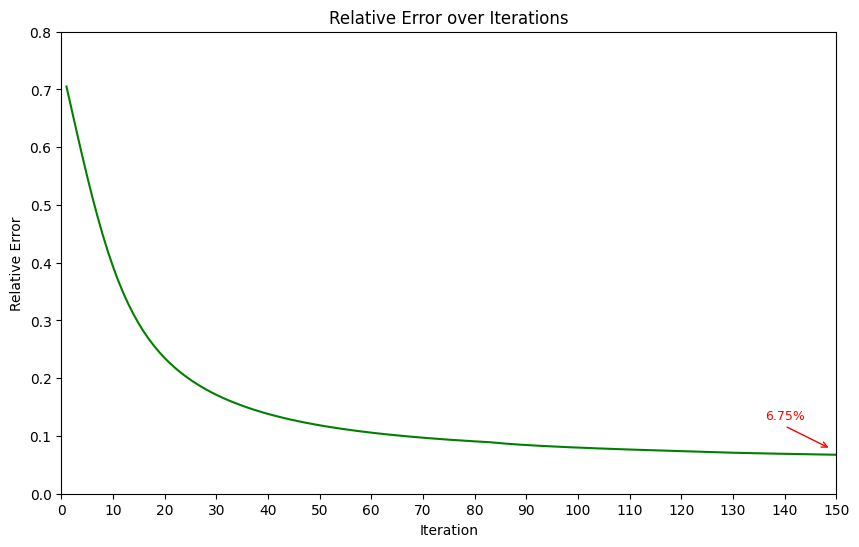

In [13]:
# Extract the iteration numbers and corresponding errors from the dictionary
iterations = [i + 1 for i in RE_list.keys()]
errors = list(RE_list.values())

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the relative error over iterations with a line plot
plt.plot(iterations, errors, linestyle='-', color='g')  # Plot with line only

# Set the x-axis ticks for better readability
plt.xticks(ticks=range(min(iterations) - 1, max(iterations) - 1 + 30, 10))

# Label the x-axis and y-axis
plt.xlabel('Iteration')
plt.ylabel('Relative Error')

# Set the title for the plot
plt.title('Relative Error over Iterations')

# Annotate the plot with the relative error percentage at the final iteration
plt.annotate(f'{RE_list[149] * 100:.2f}%',
             (140, RE_list[149] + 0.05),
             textcoords="offset points",
             xytext=(0, 5),
             ha='center',
             fontsize=9,
             color='red')

# Draw an arrow indicating the final relative error point on the plot
plt.annotate('',
             xy=(149, RE_list[149] + 0.01),
             xytext=(140, RE_list[149] + 0.05),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', linewidth=1.0))

# Set the limits for the x-axis and y-axis
plt.xlim(0, 150)
plt.ylim(0, 0.8)

# Display the plot
plt.show()


## **Conclusion**

The implementation of the Singular Value Thresholding (SVT) algorithm successfully demonstrated its ability to recover low-rank matrices from sparse data. Based on the methodology detailed in the paper [**A Singular Value Thresholding Algorithm for Matrix Completion**](https://arxiv.org/abs/0810.3286), the following key outcomes were achieved:

### Summary of Findings

1. **Matrix Completion Efficiency**: The SVT algorithm effectively completed matrix recovery on the GoodBooks dataset, which had a sparse matrix with approximately **98.4%** missing values. By utilizing 80% of the non-zero elements for training and 20% for validation, the algorithm efficiently reconstructed the missing values.

2. **Algorithm Performance**:
   - **Relative Error**: The SVT algorithm achieved a relative error of **6.75%** after **150 iterations**, indicating high accuracy in approximating the original matrix with a low-rank representation.
   - **Convergence**: The convergence behavior was demonstrated through plots showing the decrease in relative error over iterations. The algorithm exhibited steady convergence with decreasing error as iterations progressed.

3. **Parameter Tuning**:
   - **Threshold $\tau$**: The selected threshold of $\tau = 4600$ and step size $\delta = 1.26$ were instrumental in achieving optimal results. These parameters influenced the soft-thresholding and update rules, impacting both convergence speed and accuracy.

4. **Practical Implications**: The results underscore the SVT algorithm's potential for practical applications such as recommendation systems and collaborative filtering. Its capability to handle large, sparse matrices efficiently makes it a valuable tool in data science and machine learning.

### Visual Insights

- **Convergence Plots**: The provided plots illustrate the SVT algorithm's convergence, showcasing the decline in relative error over the course of the iterations.
- **Performance Metrics**: Tables and graphs detail the accuracy of the recovered matrix and the relative errors for each iteration, validating the algorithm's effectiveness.

In conclusion, the SVT algorithm proves to be a robust and efficient method for matrix completion, effectively recovering low-rank matrices from sparse data with notable accuracy. However, **one notable weakness of the SVT algorithm is its computational expense**, particularly for large-scale problems where singular value thresholding operations become increasingly costly. Despite this, the results confirm the theoretical advantages of the SVT approach and highlight its practical applicability in real-world scenarios.


# <font color="#9B1B30">Appendix - Collaborative Filtering</font>
Collaborative filtering is a technique used to identify relevant items for a specific user by:  
- Filtering through a large set of items to find the most relevant ones.  
- Considering the preferences and behaviors of many users to make recommendations.

In [14]:
print("User-Product Matrix:\n", Matrix_book_X)

User-Product Matrix:
 [[5 0 3 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 3]]


In [15]:
# Print details of X and validation matrices
print(f"Shape of X matrix: {Matrix_book_X.shape}")
print(f"Maximum value: {np.max(Matrix_book_X)}")
print(f"Minimum value: {np.min(Matrix_book_X)}")
print('-' * 60)
print(f"Number of zeros: {np.count_nonzero(Matrix_book_X == 0)}")
print(f"Percentage of zeros: {round(np.count_nonzero(Matrix_book_X == 0) / Matrix_book_X.size * 100, 3)}")
print(f"Number of non-zeros: {np.count_nonzero(Matrix_book_X != 0)}")
print( f"Percentage of non-zeros: {round(np.count_nonzero(Matrix_book_X != 0) / Matrix_book_X.size * 100, 3)}")

Shape of X matrix: (6248, 1000)
Maximum value: 5
Minimum value: 0
------------------------------------------------------------
Number of zeros: 6168136
Percentage of zeros: 98.722
Number of non-zeros: 79864
Percentage of non-zeros: 1.278


## <font color="#9B1B30"> A1 - User-Based Collaborative Filtering </font>


### Overview  
User-based collaborative filtering recommends items to a user by identifying other users with similar preferences. It operates in the following way:  

1. **Find users who are most similar to the target user (neighbors)**  
   - This is done by comparing the preferences of the target user to those of other users.  

2. **Recommend items that the user has not yet purchased**  
   - The recommendation is based on items most preferred by the user’s neighbors.  

### Steps  

#### **1. Normalize by Subtracting the User Mean**  
For a given user $u$, normalize the ratings by subtracting the mean rating of that user:  

$$
\tilde{r}_{ui} = r_{ui} - \bar{r}_u
$$

where $ \bar{r}_u $ is the mean of all non-missing ratings of user $ u $.  

#### **2. Calculate the Similarity Between Two Users (User $ u $ and User $ v $)**  
The similarity between users $ u $ and $ v $ is computed using Cosine Similarity:  

$$
s_{uv} = \frac{\sum_{i \in I_u \cap I_v} \tilde{r}_{ui} \cdot \tilde{r}_{vi}}{\sqrt{\sum_{i \in I_u \cap I_v} \tilde{r}_{ui}^2} \cdot \sqrt{\sum_{i \in I_u \cap I_v} \tilde{r}_{vi}^2}}
$$

where:  
- $ I_u \cap I_v $ is the set of all items rated by both users $ u $ and $ v $.  
- $ s_{uv} $ measures the similarity between users based on their common ratings.  

#### **3. Predict a Missing Rating Using a Weighted Average**  
To predict a missing rating for a user, compute:  

$$
r_{ui} = \frac{\sum_{v, i \in I_v} s_{uv} \cdot \tilde{r}_{vi}}{\sum_{v, i \in I_v} s_{uv}} + \bar{r}_u
$$

where:  
- $ I_v $ represents the set of users who have rated item $ i $.  
- The predicted rating is a weighted sum of the ratings given by similar users, adjusted by the target user’s mean rating.  


### **Demo code for the target user (index = 0)**

In [16]:
# Target the first user (index 0)
target_index = 0
print(Matrix_book_X[target_index, :])

[5 0 3 0 0 5 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 3 0 0 0 0 0 0 3 4 5 0 0 0 4 4 0
 0 3 0 4 0 0 0 0 4 5 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 4 0 0 4 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 4 5 4 3 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 3 4 3 0 0 0 4 5 0 0 0 0 0 0 0
 0 0 4 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 5 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 5 3 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 2 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 0 0 0 0 4 0 0 0 0 3 0 

In [17]:
# # Step 1:
#Calculate user mean
user_means = np.array([np.sum(row) / np.count_nonzero(row) if np.count_nonzero(row) > 0 else 0 for row in Matrix_book_X])

# Normalize by subtracting user mean
norm_ratings = (Matrix_book_X - user_means[:, None]) * (Matrix_book_X != 0)

# Print basic information about norm_ratings
with pd.option_context('display.float_format', '{:.2f}'.format):
    print("Normalized Ratings:\n")
    display(pd.DataFrame(norm_ratings))

Normalized Ratings:



,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.39,-0.00,-0.61,-0.00,-0.00,1.39,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
1,-0.41,-0.00,-0.00,1.59,-0.00,-0.00,-0.41,-0.00,-0.00,-0.00,...,-0.00,-0.41,-0.00,-0.41,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2,1.36,-0.00,-2.64,-0.00,-0.00,-0.00,-0.00,-0.64,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
3,0.15,-0.85,-0.00,1.15,1.15,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.15,-0.00
4,0.52,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6244,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
6245,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6246,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00


In [18]:
# Step 2:
# Get normalized ratings for the target user
target_norm = norm_ratings[target_index, :]

# Compare the Target row with all other rows
common_mask = (Matrix_book_X != 0) & (Matrix_book_X[target_index, :] != 0)

# Only consider co-rated users (those who share at least one non-zero rating)
dot_products = np.sum(norm_ratings * (common_mask * target_norm[None, :]), axis=1)

# Compute norms using only the common ratings:
target_norms = np.sqrt(np.sum((target_norm[None, :] * common_mask)**2, axis=1))
user_norms = np.sqrt(np.sum((norm_ratings * common_mask)**2, axis=1))

# Compute cosine similarity: dot / (norm_target * norm_user), handling division by zero.
denom = target_norms * user_norms
sims = np.divide(dot_products, denom, out=np.zeros_like(dot_products), where=denom != 0)
sims[target_index] = 0

# Print the cosine similarities
print("\nCosine similarities with target item:\n", pd.DataFrame(sims, columns=["Cosine Similarity"]))


Cosine similarities with target item:
       Cosine Similarity
0              0.000000
1              0.457633
2              0.712432
3             -0.018325
4              0.431597
...                 ...
6243           0.000000
6244           0.000000
6245           0.000000
6246           0.000000
6247           0.000000

[6248 rows x 1 columns]


In [19]:
# Step 3: Predict missing ratings for the target user
# Start with the target user's existing ratings
predictions = Matrix_book_X[target_index, :].copy()

# Loop over all items (columns) to predict missing ratings (where the rating is 0)
for j in range(Matrix_book_X.shape[1]):
    if Matrix_book_X[target_index, j] == 0:  # Only predict for missing ratings (zero values)
        rated_mask = Matrix_book_X[:, j] != 0  # Mask for users who have rated item j
        numerator = np.sum(sims[rated_mask] * norm_ratings[rated_mask, j])  # Compute weighted sum of ratings
        denominator = np.sum(np.abs(sims[rated_mask]))  # Sum of absolute similarities (normalization factor)

        if denominator > 0:  # If there are any co-rated users
            predictions[j] = user_means[target_index] + (numerator / denominator)  # Predict rating using weighted average
        else:  # If no co-rated users, use the user's mean rating
            predictions[j] = user_means[target_index]

# Print original ratings and predicted ratings for the target user
print("\nOriginal ratings (target user):")
print(Matrix_book_X[target_index])
print("\nPredicted ratings (target user):")
print(predictions)


Original ratings (target user):
[5 0 3 0 0 5 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 3 0 0 0 0 0 0 3 4 5 0 0 0 4 4 0
 0 3 0 4 0 0 0 0 4 5 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 4 0 0 4 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 4 5 4 3 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 3 4 3 0 0 0 4 5 0 0 0 0 0 0 0
 0 0 4 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 5 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 5 3 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 2 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## <font color="#9B1B30 ">A2 - Item-Based Collaborative Filtering </font>


### Overview  
Item-based collaborative filtering recommends items to a user by identifying items similar to those the user has already rated. It operates in the following way:  

1. **Find items that are most similar to the items the user has rated**  
   - This is done by comparing the ratings of items that the user has rated to those of other items.  

2. **Recommend items that the user has not yet rated**  
   - The recommendation is based on items most similar to those that the user has rated highly.  

### Steps  

#### **1. Normalize by Subtracting the Item Mean**  
For a given item $i$, normalize the ratings by subtracting the mean rating of that item:  

$$
\tilde{r}_{ui} = r_{ui} - \bar{r}_i
$$

where $ \bar{r}_i $ is the mean of all non-missing ratings for item $ i $.  

#### **2. Calculate the Similarity Between Two Items (Item $i$ and Item $j$)**  
The similarity between items $i$ and $j$ is computed using Cosine Similarity:  

$$
s_{ij} = \frac{\sum_{u \in U_i \cap U_j} \tilde{r}_{ui} \cdot \tilde{r}_{uj}}{\sqrt{\sum_{u \in U_i \cap U_j} \tilde{r}_{ui}^2} \cdot \sqrt{\sum_{u \in U_i \cap U_j} \tilde{r}_{uj}^2}}
$$

where:  
- $ U_i \cap U_j $ is the set of all users who have rated both item $i$ and item $j$.  
- $ s_{ij} $ measures the similarity between items based on their common ratings by users.  

#### **3. Predict a Missing Rating Using a Weighted Average**  
To predict a missing rating for a user on item $i$, compute:  

$$
r_{ui} = \frac{\sum_{j \in I_u} s_{ij} \cdot \tilde{r}_{uj}}{\sum_{j \in I_u} s_{ij}} + \bar{r}_i
$$

where:  
- $ I_u $ represents the set of items that the user $ u $ has rated.  
- The predicted rating is a weighted sum of the ratings for similar items, adjusted by the mean rating of item $i$.  


### **Demo code for the target user (index = 0)**

In [20]:
# Step 1: Compute the mean rating for each item (column)
item_means = np.nanmean(np.where(Matrix_book_X != 0, Matrix_book_X, np.nan), axis=0)  # Ignore missing ratings (0)
#item_means = np.array([np.sum(Matrix_book_X[:, col]) / np.count_nonzero(Matrix_book_X[:, col]) \
# if np.count_nonzero(Matrix_book_X[:, col]) > 0 else 0 for col in range(Matrix_book_X.shape[1])])


# Normalize the ratings by subtracting the item mean (for each item)
norm_ratings = (Matrix_book_X - item_means) * (Matrix_book_X != 0)  # Only normalize non-zero ratings

# Print normalized ratings to check
with pd.option_context('display.float_format', '{:.2f}'.format):
    print("Normalized Ratings:\n")
    display(pd.DataFrame(norm_ratings))

Normalized Ratings:



,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.77,-0.00,-0.03,-0.00,-0.00,0.89,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
1,-1.23,-0.00,-0.00,0.57,-0.00,-0.00,-0.82,-0.00,-0.00,-0.00,...,-0.00,-0.53,-0.00,-1.18,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2,0.77,-0.00,-2.03,-0.00,-0.00,-0.00,-0.00,-0.85,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
3,-0.23,-1.38,-0.00,0.57,1.02,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.07,-0.00
4,-0.23,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
6244,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.04
6245,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
6246,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.04


In [21]:
# Step 2: Compute cosine similarities between the target item and all other items
# Select a target item (for example, the first item, index 0)
target_index = 0
target_norm = norm_ratings[:, target_index]  # Ratings for the target item

# Compute dot products for cosine similarity
dot_products = np.sum(norm_ratings * (common_mask * target_norm[:, None]), axis=0)

# Compute norms of the items (only considering common ratings)
target_norms = np.sqrt(np.sum((target_norm[:, None] * common_mask)**2, axis=0))
item_norms = np.sqrt(np.sum((norm_ratings * common_mask)**2, axis=0))

# Compute cosine similarity between items (dot product / norms)
denom = target_norms * item_norms
sims = np.divide(dot_products, denom, out=np.zeros_like(dot_products), where=denom != 0)  # Cosine similarity
sims[target_index] = 0  # Exclude self-similarity

# Print the cosine similarities
print("\nCosine similarities with target item:\n", pd.DataFrame(sims, columns=["Cosine Similarity"]))


Cosine similarities with target item:
      Cosine Similarity
0             0.000000
1             0.000000
2             0.049077
3             0.000000
4             0.000000
..                 ...
995           0.000000
996           0.000000
997           0.000000
998           0.000000
999           0.000000

[1000 rows x 1 columns]


In [22]:
# Step 3: Predict missing ratings for the target user
# Start with the target user's existing ratings
predictions = Matrix_book_X[target_index, :].copy()  # Copy target user's ratings

# Loop over all items (columns) to predict missing ratings (where the rating is 0)
for j in range(Matrix_book_X.shape[1]):
    if Matrix_book_X[target_index, j] == 0:  # Only predict for missing ratings (zero values)
        rated_mask = Matrix_book_X[target_index, :] != 0  # Mask for items rated by the target user
        numerator = np.sum(sims[rated_mask] * norm_ratings[target_index, rated_mask])  # Weighted sum of ratings
        denominator = np.sum(np.abs(sims[rated_mask]))  # Sum of absolute similarities (normalization factor)

        if denominator > 0:  # If there are any similar items rated by the user
            predictions[j] = item_means[j] + (numerator / denominator)  # Predict rating using weighted average
        else:  # If no similar items, use the item's mean rating
            predictions[j] = item_means[j]

# Print original ratings and predicted ratings for the target user
print("\nOriginal ratings (target user):")
print(Matrix_book_X[target_index])
print("\nPredicted ratings (target user):")
print(predictions)


Original ratings (target user):
[5 0 3 0 0 5 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 3 0 0 0 0 0 0 3 4 5 0 0 0 4 4 0
 0 3 0 4 0 0 0 0 4 5 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 4 0 0 4 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 4 5 4 3 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 3 4 3 0 0 0 4 5 0 0 0 0 0 0 0
 0 0 4 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 5 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 5 3 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 2 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 